## 两个纵轴
* link: https://blog.csdn.net/WOSHIRENXIN/article/details/126216087

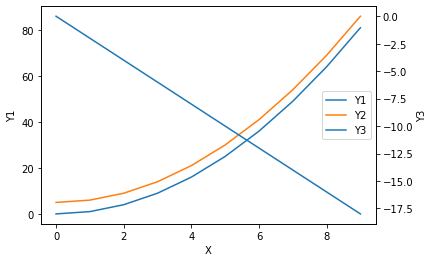

In [1]:
import matplotlib.pyplot as plt

# X横坐标
X=[i for i in range(10)]
# Y1 左纵坐标下的线1
Y1=[i**2 for i in range(10)]
# Y2 左纵坐标下的线2
Y2=[i**2+5 for i in range(10)]
# Y3 右纵坐标下的线1
Y3=[-i*2 for i in range(10)]

fig, ax1 = plt.subplots()

# 纵坐标一
ax1.plot(X, Y1,label="Y1")
ax1.set_xlabel("X")
ax1.set_ylabel("Y1")

ax1.plot(X, Y2,label="Y2")
ax1.set_xlabel("X")

# 纵坐标二
ax2 = ax1.twinx()
ax2.plot(X, Y3,label="Y3")
ax2.set_ylabel("Y3")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1+handles2, labels1+labels2, loc='right')

plt.show()


## 多个纵轴
* link: https://blog.csdn.net/ayuan_ayuan/article/details/106362611?

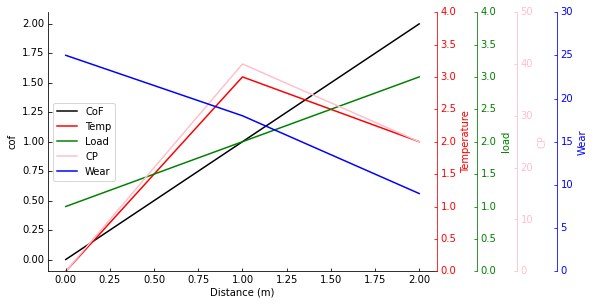

In [2]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)

#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('cof')
ax_cof.set_xlabel('Distance (m)')
ax_temp.set_ylabel('Temperature')
ax_load.set_ylabel('load')
ax_cp.set_ylabel('CP')
ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''

curve_cof, = ax_cof.plot([0, 1, 2], [0, 1, 2], label="CoF", color='black')
curve_temp, = ax_temp.plot([0, 1, 2], [0, 3, 2], label="Temp", color='red')
curve_load, = ax_load.plot([0, 1, 2], [1, 2, 3], label="Load", color='green')
curve_cp, = ax_cp.plot([0, 1, 2], [0, 40, 25], label="CP", color='pink')
curve_wear, = ax_wear.plot([0, 1, 2], [25, 18, 9], label="Wear", color='blue')

ax_temp.set_ylim(0,4)
ax_load.set_ylim(0,4)
ax_cp.set_ylim(0,50)
ax_wear.set_ylim(0,30)

ax_cof.legend()

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
ax_cp.axis['right3'].label.set_color('pink')
ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
ax_cp.axis['right3'].major_ticks.set_color('pink')
ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
ax_cp.axis['right3'].major_ticklabels.set_color('pink')
ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
ax_cp.axis['right3'].line.set_color('pink')
ax_wear.axis['right4'].line.set_color('blue')

plt.show()


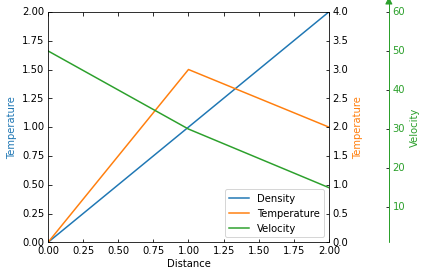

In [3]:
%matplotlib inline
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(1)

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.set_ylabel('Denstity')
host.set_xlabel('Distance')

host.axis['right'].set_visible(False)
par1.axis['right'].set_visible(True)
par1.set_ylabel('Temperature')

par1.axis['right'].major_ticklabels.set_visible(True)
par1.axis['right'].label.set_visible(True)

par2.set_ylabel('Velocity')
offset = (60, 0)
new_axisline = par2._grid_helper.new_fixed_axis
 # "_grid_helper"与"get_grid_helper()"等价，可以代替
#new_axisline = par2.get_grid_helper().new_fixed_axis  # 用"get_grid_helper()"代替，结果一样，区别目前不清楚
par2.axis['right2'] = new_axisline(loc='right', axes=par2, offset=offset)

fig.add_axes(host)

host.set_xlim(0,2)
host.set_ylim(0,2)

host.set_xlabel('Distance')
host.set_ylabel('Density')
host.set_ylabel('Temperature')

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2],label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0,4)
par2.set_ylim(1,60)

host.legend()
#轴名称，刻度值的颜色
host.axis['left'].label.set_color(p1.get_color())
par1.axis['right'].label.set_color(p2.get_color())
par2.axis['right2'].label.set_color(p3.get_color())
par2.axis['right2'].major_ticklabels.set_color(p3.get_color()) #刻度值颜色
par2.axis['right2'].set_axisline_style('-|>',size=1.5)  #轴的形状色
par2.axis['right2'].line.set_color(p3.get_color())  #轴的颜色


## 多曲线多纵轴


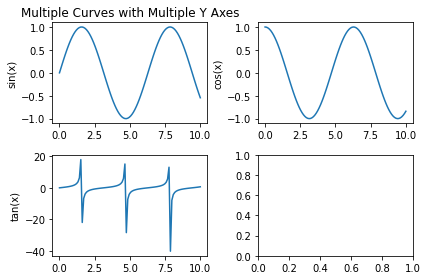

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# 创建数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
# 创建子图布局
fig, axs = plt.subplots(2, 2)  # 2行2列的子图布局
# 在第一个子图上绘制sin曲线，并设置纵轴标签和标题
axs[0, 0].plot(x, y1)
axs[0, 0].set_ylabel('sin(x)')
axs[0, 0].set_title('Multiple Curves with Multiple Y Axes')
# 在第二个子图上绘制cos曲线，并设置纵轴标签和标题
axs[0, 1].plot(x, y2)
axs[0, 1].set_ylabel('cos(x)')
# 在第三个子图上绘制tan曲线，并设置纵轴标签和标题
axs[1, 0].plot(x, y3)
axs[1, 0].set_ylabel('tan(x)')
# 调整子图间距，使它们不会重叠
plt.tight_layout()
# 显示图表
plt.show()